### Student Grouping and Sorting Based on GPA, Gender, and School
*Team Members*: 
1. LEE ZHE CHIAN
2. JESMOND TAY SOON XIANG
3. LEE ZHENG JIE
4. KATTA ROHITA
5. HTET MOE HAN

*Objectives*:
Form balanced groups containing 5 students each.

### Problem Decomposition
*Problem Statement*
sort students from different tutorial groups into smaller groups based on the following requirements.
   - Each group should have a maximum of five students.
   - Gender ratio must follow a 3:2 pattern
   - Each group should contain students having different ranges in their GPA.
   - Each group should not have more than 2 people from the same school.
*Problem Decomposition Process*  

Step 1: Load the CSV file containing student data.

Step 2: Group students by their tutorial group.

Step 3: Classify students into three GPA categories - above average, average, and below average

Step 4: Implement three sorting functions to assign students to groups while respecting gender, GPA, and school constraints.

Step 5: Add the remaining students to the reserved dictionary and use them to fill in remaining spots making sure that the gender and school constraints.

Step 6: If there are still remaining students in reserved dictionary, gpa and school constraints are relaxed. Sorting will be only based on gender.

### Data Analysis
- The data file consists of:
     - Tutorial Group
     - Student ID
     - School
     - Name
     - Gender
     - GPA.

- Data is loaded into a Python list structure for initial processing and then categorized into dictionaries based on tutorial groups and GPA levels

### Pseudocode / Flowchart
**1st draft of plan**: 
1. Read CSV File
- Import data from the CSV file containing student information.

2. Split by Tutorial Group
- Separate students into their respective tutorial groups.

3. Set GPA Benchmark
- For each tutorial, Calculate the average and range of GPA scores across all students in the group to establish a benchmark.

4. Split Students by School
- Within each tutorial group, divide students according to their school.

5. Classify Students by GPA Level
- Within each school, categorize students into three subgroups based on GPA:

## Difficulty faced implementing the first plan
1. We tried to create functions that sort only one constraint at a time and when we tried to merge it together, we found it impossible to do so. 



**2nd draft of plan**: 
1. Read CSV File

2. Split by tutorial groups using dictionary
- {tutorial: list of studens' data}

3. Create gpa dictionary:
- {tutorial group: list of students' data, with gpa as the first element}
- convert gpa from string to float

4. Sort gpa in ascending order
- For each tutorial in the gpa dictionary, sort the student's gpa in ascending order

5. Grouping students in each tutorial groups into three gpa types:
- the first 20 students are assigned Below
- the consecutive studentsa are assigned Average 
- the last 10 students are assigned Above Average

6. Initialize sorted_dictionary to store the sorted students, reserved dictionary to store students that dont fit the constraints.

6. First sorting which includes gpa, school and gender constraint 

- the fist sorting aims to choose 2 above average, 1 average and 2 below average, while checking the gender constraints(majority gender<=3 and minority gender<=2) and making sure students from same school does not exceed 2.

- if the students do not fit the constraints, they will be added to reserved dictionary from which they will be assessed later.

7. Second sorting sorts according to the same constraints as the first sorting but this time it is filling up teams with students from the reserved dictionary.
- For each team in the tutorial group, the function will loop through the reserved dictionary until the team contains 5 members
- However there may be cases whereby situation is not so ideal that all students are able to meet the constraints, thus there will be leftovers in the reserved dictionary

8. Final sorting with relaxed constraints
- Gender constraints are checked only

- If gender constraints cannot be met, students will just be assigned to teams that do not have 5 members from the reserved dictionary

9. Output as csv file

10. Analysis of the results using matplotlib


### Step 1: Load and Display Data
This cell loads the CSV data and organizes it into lists for further processing.

In [1]:
# Cell 1: 
csvlist = []
import csv

# Open the CSV file 
with open("C:\\Users\\jesmo\\OneDrive\\Documents\\records.csv", mode ='r') as file:
    csvFile = csv.reader(file)

    # Append each row of CSV to csvlist as a list
    for lines in csvFile:
        csvlist.append(lines)

# Print the entire CSV data to verify 
print("CSV Data Loaded:", csvlist)

CSV Data Loaded: [['Tutorial Group', 'Student ID', 'School', 'Name', 'Gender', 'CGPA'], ['G-1', '5002', 'CCDS', 'Aarav Singh', 'Male', '4.02'], ['G-1', '3838', 'EEE', 'Aarti Nair', 'Female', '4.05'], ['G-1', '2091', 'EEE', 'Adlan Bin Rahman', 'Male', '4.2'], ['G-1', '288', 'CoB (NBS)', 'Ajay Verma', 'Male', '4.01'], ['G-1', '4479', 'CCDS', 'Amelia Kim', 'Female', '4.11'], ['G-1', '5708', 'SoH', 'Ananya Ramesh', 'Male', '4.2'], ['G-1', '4563', 'WKW SCI', 'Anjali Patel', 'Female', '4.01'], ['G-1', '3989', 'WKW SCI', 'Anthony Liu', 'Male', '4.15'], ['G-1', '2115', 'EEE', 'Anya Kumar', 'Female', '4.03'], ['G-1', '1383', 'CoB (NBS)', 'Areeba Khan', 'Female', '4.19'], ['G-1', '1417', 'CoE', 'Darren Lee', 'Male', '4.12'], ['G-1', '1075', 'CoB (NBS)', 'Felix Yip', 'Male', '4.08'], ['G-1', '3148', 'EEE', 'Gabriel Young', 'Male', '3.88'], ['G-1', '4402', 'CCDS', 'Grace Turner', 'Female', '4.08'], ['G-1', '945', 'MAE', 'Han Li', 'Female', '4.1'], ['G-1', '2230', 'CoB (NBS)', 'Harlow Wang', 'Femal

In [2]:
# Cell 2: Sort students into tutorial groups in tut_dict as lists (Ex: tutgrp: [])
tut_dict = {}

# Loop through each student entry in csvlist
for i in csvlist:
    if i[0] == 'Tutorial Group':
        continue
    elif i[0] in tut_dict:
        # If the tutorial group already exists, append the student to that group
        tut_dict[i[0]].append(i)
    else:
        # Otherwise, create a new list for this tutorial group
        tut_dict[i[0]] = [i]

print("Tutorial Group G-1 Data:", tut_dict.get('G-1')) #Printing the data a specific tutorial group to verify

Tutorial Group G-1 Data: [['G-1', '5002', 'CCDS', 'Aarav Singh', 'Male', '4.02'], ['G-1', '3838', 'EEE', 'Aarti Nair', 'Female', '4.05'], ['G-1', '2091', 'EEE', 'Adlan Bin Rahman', 'Male', '4.2'], ['G-1', '288', 'CoB (NBS)', 'Ajay Verma', 'Male', '4.01'], ['G-1', '4479', 'CCDS', 'Amelia Kim', 'Female', '4.11'], ['G-1', '5708', 'SoH', 'Ananya Ramesh', 'Male', '4.2'], ['G-1', '4563', 'WKW SCI', 'Anjali Patel', 'Female', '4.01'], ['G-1', '3989', 'WKW SCI', 'Anthony Liu', 'Male', '4.15'], ['G-1', '2115', 'EEE', 'Anya Kumar', 'Female', '4.03'], ['G-1', '1383', 'CoB (NBS)', 'Areeba Khan', 'Female', '4.19'], ['G-1', '1417', 'CoE', 'Darren Lee', 'Male', '4.12'], ['G-1', '1075', 'CoB (NBS)', 'Felix Yip', 'Male', '4.08'], ['G-1', '3148', 'EEE', 'Gabriel Young', 'Male', '3.88'], ['G-1', '4402', 'CCDS', 'Grace Turner', 'Female', '4.08'], ['G-1', '945', 'MAE', 'Han Li', 'Female', '4.1'], ['G-1', '2230', 'CoB (NBS)', 'Harlow Wang', 'Female', '4.18'], ['G-1', '4520', 'EEE', 'Henry Foster', 'Male', '4

In [3]:
# Cell 3: Count the number of students in a tutorial group and create a GPA dictionary
number_of_student = 0
# Count students in the tutorial group 'G-1'
for i in tut_dict['G-1']:
    number_of_student += 1
print("Number of students in G-1:", number_of_student)

# Create GPA dictionary with structure 'tutorial group': [[GPA, name, school, gender]]
gpa_dict = {}
for tut, tut_info in tut_dict.items():
    # Loop through each student in the tutorial group
    for i in range(number_of_student):
        student_info = tut_info[i]
        student_gpa = float(student_info[5])  # Convert GPA to float
        student_name = student_info[3]
        student_school = student_info[2]
        student_gender = student_info[4]
        student_id=student_info[1]

        # Add the student's GPA, name, school, and gender to the dictionary
        if tut not in gpa_dict:
            gpa_dict[tut] = [[student_gpa, student_name, student_school, student_gender, student_id]]
        else:
            gpa_dict[tut].append([student_gpa, student_name, student_school, student_gender, student_id])

# Print GPA data to check structure and contents
print("GPA Data for Group G-1:", gpa_dict['G-1'])
print(len(gpa_dict['G-1']))

Number of students in G-1: 50
GPA Data for Group G-1: [[4.02, 'Aarav Singh', 'CCDS', 'Male', '5002'], [4.05, 'Aarti Nair', 'EEE', 'Female', '3838'], [4.2, 'Adlan Bin Rahman', 'EEE', 'Male', '2091'], [4.01, 'Ajay Verma', 'CoB (NBS)', 'Male', '288'], [4.11, 'Amelia Kim', 'CCDS', 'Female', '4479'], [4.2, 'Ananya Ramesh', 'SoH', 'Male', '5708'], [4.01, 'Anjali Patel', 'WKW SCI', 'Female', '4563'], [4.15, 'Anthony Liu', 'WKW SCI', 'Male', '3989'], [4.03, 'Anya Kumar', 'EEE', 'Female', '2115'], [4.19, 'Areeba Khan', 'CoB (NBS)', 'Female', '1383'], [4.12, 'Darren Lee', 'CoE', 'Male', '1417'], [4.08, 'Felix Yip', 'CoB (NBS)', 'Male', '1075'], [3.88, 'Gabriel Young', 'EEE', 'Male', '3148'], [4.08, 'Grace Turner', 'CCDS', 'Female', '4402'], [4.1, 'Han Li', 'MAE', 'Female', '945'], [4.18, 'Harlow Wang', 'CoB (NBS)', 'Female', '2230'], [4.11, 'Henry Foster', 'EEE', 'Male', '4520'], [4.03, 'Isabella Thompson', 'CoB (NBS)', 'Female', '567'], [4.12, 'Jett Morales', 'MAE', 'Male', '1841'], [4.03, 'Jie

In [4]:
# Cell 4: Sort the list of GPA in each tutorial group
for tut, gpa in gpa_dict.items():
    # Sort each group's list by GPA in ascending order
    gpa_dict[tut] = sorted(gpa, key=lambda x: x[0])

# Print sorted GPA data for a specific group to verify
print("Sorted GPA Data for Group G-1:", gpa_dict['G-1'])

Sorted GPA Data for Group G-1: [[3.85, 'Nguyen Van Sam', 'NIE', 'Male', '1329'], [3.88, 'Gabriel Young', 'EEE', 'Male', '3148'], [3.88, 'Truong Minh Chau', 'SSS', 'Female', '2417'], [3.93, 'Zachary Wu', 'CoE', 'Male', '1645'], [3.95, 'Karen Wong', 'SBS', 'Female', '2353'], [3.95, 'Vivi Dwi', 'CoB (NBS)', 'Female', '2326'], [4.0, 'Oleg Petrovich', 'SoH', 'Male', '4657'], [4.01, 'Ajay Verma', 'CoB (NBS)', 'Male', '288'], [4.01, 'Anjali Patel', 'WKW SCI', 'Female', '4563'], [4.02, 'Aarav Singh', 'CCDS', 'Male', '5002'], [4.02, 'Mei Hong', 'EEE', 'Female', '2151'], [4.03, 'Anya Kumar', 'EEE', 'Female', '2115'], [4.03, 'Isabella Thompson', 'CoB (NBS)', 'Female', '567'], [4.03, 'Jie Zhang', 'EEE', 'Male', '4576'], [4.03, 'Sakina Ahmed', 'CCDS', 'Female', '75'], [4.04, 'Nhung Vu', 'ADM', 'Female', '5119'], [4.04, 'Prerna Gupta', 'MAE', 'Female', '1555'], [4.05, 'Aarti Nair', 'EEE', 'Female', '3838'], [4.06, 'Lucas Walker', 'MAE', 'Male', '588'], [4.06, 'Ming Zhang', 'CCDS', 'Male', '235'], [4

In [5]:
# Cell 5: Count gender distribution in tutorial groups
# Initialize counters for male and female students in G-1
gender_count1 = {'Male': 0, 'Female': 0}
for student in gpa_dict['G-1']:
    # Increment the counter based on student gender
    gender_count1[student[3]] += 1
print("Gender Count in Group G-1:", gender_count1)

# Repeat the process for tutorial group G-2
gender_count2 = {'Male': 0, 'Female': 0}
for student in gpa_dict['G-2']:
    gender_count2[student[3]] += 1
print("Gender Count in Group G-2:", gender_count2)

Gender Count in Group G-1: {'Male': 21, 'Female': 29}
Gender Count in Group G-2: {'Male': 18, 'Female': 32}


## Algorithm Planning and Design

### Solution Design
The algorithm follows these main steps:
1. Data Loading and Sorting: Organize data by tutorial groups.
2. GPA Categorization: Divide students into above, average, and below GPA groups.
3. Initial Grouping: Use constraints to form balanced groups.
4. Secondary Sorting: Add ungrouped students to groups needing additional members.
5. Final sorting: Sorting with relaxed constraints.

### Modular Design
- **first_sorting**: Initial sorting based on GPA, gender, and school.
- **add_leftover**: Manages leftover students that are not added into the reserved dictionary.
- **second_sort**: Second balancing of group members.
- **final_sort**: Final sorting of the group members. 

### Step 2: Grouping and Sorting by GPA and Gender
*This section begins grouping students based on GPA and gender distribution constraints.

In [6]:
# Cell 6: 
# Create dictionaries to categorize students based on GPA for each tutorial group
above_average_dict = {}
average_dict = {}
below_average_dict = {}

# Split each group into segments based on GPA
for tut, gpa_list in gpa_dict.items():
    # Top 20 students are considered above average
    above_average_dict[tut] = gpa_list[30:50]
    # Middle 10 students are considered average
    average_dict[tut] = gpa_list[20:30]
    # Bottom 20 students are considered below average
    below_average_dict[tut] = gpa_list[0:20]

# Print the above-average list for a specific group to verify
print("Above Average for Group G-2:", above_average_dict['G-2'])

Above Average for Group G-2: [[4.12, 'Jasper Lim', 'SPMS', 'Male', '2473'], [4.12, 'Mei Zhao', 'SBS', 'Female', '2712'], [4.15, 'Izzat Bin Ibrahim', 'CEE', 'Male', '3533'], [4.15, 'Mira Lin', 'CoB (NBS)', 'Female', '5080'], [4.15, 'Sophia Koh', 'ADM', 'Female', '1455'], [4.16, 'Nadia Iqbal', 'CCEB', 'Female', '3636'], [4.17, 'Carter Moore', 'MSE', 'Male', '2788'], [4.17, 'Lana Turner', 'CoB (NBS)', 'Female', '229'], [4.17, 'Selena Tan', 'MAE', 'Female', '1428'], [4.18, 'Isaiah Turner', 'EEE', 'Male', '586'], [4.18, 'Patricia Wong', 'CCEB', 'Female', '5226'], [4.19, 'Eli Walker', 'WKW SCI', 'Male', '3527'], [4.19, 'Fatima Yusof', 'MAE', 'Female', '5996'], [4.19, 'Gisela Tan', 'EEE', 'Female', '3926'], [4.19, 'Lina Binti Ali', 'SBS', 'Female', '5371'], [4.2, 'Lara Li', 'CCEB', 'Female', '1726'], [4.2, 'Nathaniel Adams', 'EEE', 'Male', '4392'], [4.2, 'Zhengrong', 'CCDS', 'Male', '1877'], [4.22, 'Shalini Pillai', 'MSE', 'Female', '3615'], [4.22, 'Sofia Chandra', 'CCDS', 'Female', '3611']]


# Computational Thinking Concept for first sorting
1. Decomposition: I used multiple dictionaries such as student_selected, student_gender and student_school to keep track of quotas that I need to meet

2. Pattern Recognition:
- As I was working through the problem, my initial plan was to sort the gpa first and sort the gender in a way that makes sure that each of them dont exceed three. However it later struck me that majority gender of a tutorial group will definitely be three while the minority gender will be two in an idealistic situation. Therefore instead of checking two genders to be less than or equal to two in the first sorting, I changed the constraints to checking the majority gender to be less than or equal to three while the minority gender to be less than or equal to two.

3. Abstraction: 
- The first check to find the target gender and non target gender helps to abstracts personal details and make the code simpler

4. Algorithmic thinking:
- first constraint check is gpa 
- second constraint check is simultaneous checks for both school and gender

5. Evaluation: 
*Problem faced*
- Students from reserved dictionary does not include all the students that are not added into the sorted dictionary in the first sorting, so I created a fill in function to add student from above_average, below_average and average dictionary. 


In [7]:
# Cell 7: Define the first_sorting function
# This function will group students based on GPA, gender, and school constraints
def first_sorting(above_average, below_average, average, reserve_dict, sorted_dict, tut, group_number, female_count, male_count):
    group_size = 0
    student_selected = {'above': 0, 'below': 0, 'average': 0}
    student_gender = {'Male': 0, 'Female': 0}
    student_school = {}

    # Loop to fill the group with 5 students based on certain criteria
    for i in range(5):
        # Determine majority gender based on counts
        if male_count > female_count:
            target_gender = 'Male'
            non_target_gender = 'Female'
        else:
            target_gender = 'Female'
            non_target_gender = 'Male'

        # Select students from above, below, or average groups based on quotas
        curr_student = None
        if student_selected['above'] < 2 and above_average:
            curr_student = above_average.pop()
            curr_student.append('above')
        elif student_selected['below'] < 2 and below_average:
            curr_student = below_average.pop()
            curr_student.append('below')
        elif student_selected['average'] < 1 and average:
            curr_student = average.pop()
            curr_student.append('average')

        # If no student is selected, continue to the next loop iteration
        if not curr_student:
            continue

        # Retrieve student details for school and gender checks
        school = curr_student[2]
        gender = curr_student[3]

        # Ensure school and gender constraints are met; otherwise, add to reserved
        if student_school.get(school, 0) >= 2 or (gender == target_gender and student_gender[target_gender] >= 3) or (gender == non_target_gender and student_gender[non_target_gender] >= 2):
            reserve_dict[tut].append(curr_student)
            continue

        # If constraints are met, add student to sorted group
        sorted_dict[tut][group_number].append(curr_student)
        student_selected[curr_student[-1]] += 1
        student_gender[gender] += 1
        if curr_student[2] in student_school:
            student_school[school]+=1
        else:
            student_school[school]=1
        
    return student_selected, student_gender, student_school


In [8]:
# Cell 8: Define add_leftover function to add remaining students to reserved_dict
# Reason for some students to be left out, the first three checks are not executed, thus not all students are popped and not all are added into the reserved dictionary.

def add_leftover(above_average, below_average, average, reserved_dict, tut):
    # Add remaining above-average students to reserved with 'above' tag
    if above_average:
        for student in above_average:
            student.append('above')
        reserved_dict[tut].extend(above_average)

    # Add remaining below-average students to reserved with 'below' tag
    if below_average:
        for student in below_average:
            student.append('below')
        reserved_dict[tut].extend(below_average)

    # Add remaining average students to reserved with 'average' tag
    if average:
        for student in average:
            student.append('average')
        reserved_dict[tut].extend(average)
    
    return reserved_dict

In [9]:
# Cell 9: Initialize dictionaries for sorted, reserved, and count data
sorted_dict = {}
reserved_dict = {}
count_dict = {}

# Initialize empty lists for each tutorial group and group number
for key in tut_dict:
    sorted_dict[key] = {}
    reserved_dict[key] = []
    count_dict[key] = {}
    for i in range(1, 11):
        sorted_dict[key][i] = []
        count_dict[key][i] = []

print("Dictionaries initialized for sorting")

Dictionaries initialized for sorting


In [10]:
# Cell 10: Get gender counts for each tutorial group
gender_count_dict = {}
for key in tut_dict:
    gender_count_dict[key] = {'Male': 0, 'Female': 0}
    for student in gpa_dict[key]:
        # Count each gender for students in the group
        gender_count_dict[key][student[3]] += 1

print("Gender Count for Group G-2:", gender_count_dict['G-2'])

Gender Count for Group G-2: {'Male': 18, 'Female': 32}


In [11]:
# Cell 11: Run first sorting function and add leftover students to reserved_dict
for key in tut_dict:
    # Apply first_sorting to each group to organize students
    for i in range(1, 11):
        dictionary = first_sorting(above_average_dict[key], below_average_dict[key], average_dict[key], reserved_dict, sorted_dict, key, i, gender_count_dict[key]['Female'], gender_count_dict[key]['Male'])
        count_dict[key][i].append(dictionary)

# Add any leftover students from above, below, and average groups to reserved_dict
for key in tut_dict:    
    add_leftover(above_average_dict[key], below_average_dict[key], average_dict[key], reserved_dict, key)

print("Reserved Students for Group G-2:", len(reserved_dict['G-2']))
print(sorted_dict['G-2'])

Reserved Students for Group G-2: 7
{1: [[4.22, 'Sofia Chandra', 'CCDS', 'Female', '3611', 'above'], [4.22, 'Shalini Pillai', 'MSE', 'Female', '3615', 'above'], [4.05, 'Derek Adams', 'SoH', 'Male', '3501', 'below'], [4.03, 'Yuri Chekhov', 'CCDS', 'Male', '1130', 'below']], 2: [[4.2, 'Zhengrong', 'CCDS', 'Male', '1877', 'above'], [4.2, 'Nathaniel Adams', 'EEE', 'Male', '4392', 'above'], [4.03, 'Yoshiko Mori', 'CCEB', 'Female', '3882', 'below'], [4.03, 'Xiu Li', 'CCEB', 'Female', '4759', 'below'], [4.11, 'Zain Qureshi', 'MSE', 'Female', '5994', 'average']], 3: [[4.2, 'Lara Li', 'CCEB', 'Female', '1726', 'above'], [4.19, 'Lina Binti Ali', 'SBS', 'Female', '5371', 'above'], [4.03, 'Winston Villanueva', 'SSS', 'Male', '248', 'below'], [4.03, 'Tina Tan', 'EEE', 'Female', '4624', 'below']], 4: [[4.19, 'Gisela Tan', 'EEE', 'Female', '3926', 'above'], [4.19, 'Fatima Yusof', 'MAE', 'Female', '5996', 'above'], [4.03, 'Tanya Sharma', 'ASE', 'Female', '3568', 'below'], [4.03, 'Ki-Hoon Kim', 'CCDS', 

In [12]:
# Cell 12: Verify sorted dictionary for Group G-2
# Print the final sorted dictionary to verify that students are organized by groups
print("Final Sorted Dictionary for Group G-2:", sorted_dict['G-2'])

Final Sorted Dictionary for Group G-2: {1: [[4.22, 'Sofia Chandra', 'CCDS', 'Female', '3611', 'above'], [4.22, 'Shalini Pillai', 'MSE', 'Female', '3615', 'above'], [4.05, 'Derek Adams', 'SoH', 'Male', '3501', 'below'], [4.03, 'Yuri Chekhov', 'CCDS', 'Male', '1130', 'below']], 2: [[4.2, 'Zhengrong', 'CCDS', 'Male', '1877', 'above'], [4.2, 'Nathaniel Adams', 'EEE', 'Male', '4392', 'above'], [4.03, 'Yoshiko Mori', 'CCEB', 'Female', '3882', 'below'], [4.03, 'Xiu Li', 'CCEB', 'Female', '4759', 'below'], [4.11, 'Zain Qureshi', 'MSE', 'Female', '5994', 'average']], 3: [[4.2, 'Lara Li', 'CCEB', 'Female', '1726', 'above'], [4.19, 'Lina Binti Ali', 'SBS', 'Female', '5371', 'above'], [4.03, 'Winston Villanueva', 'SSS', 'Male', '248', 'below'], [4.03, 'Tina Tan', 'EEE', 'Female', '4624', 'below']], 4: [[4.19, 'Gisela Tan', 'EEE', 'Female', '3926', 'above'], [4.19, 'Fatima Yusof', 'MAE', 'Female', '5996', 'above'], [4.03, 'Tanya Sharma', 'ASE', 'Female', '3568', 'below'], [4.03, 'Ki-Hoon Kim', 'CCD

In [13]:
# Cell 13: Determine the number of groups that need filling
# Helper function to identify groups with fewer than 5 students
def determine_group_filling(sorted_dict, tut_group):
    group = []
    for i in range(1, 11):
        if len(sorted_dict[tut_group][i]) < 5:
            group.append(i)  # Add groups that need filling
    return group      

# Determine groups with fewer males
def determine_group_with_less_male(group_filling, tut_group):
    group = []
    for i in group_filling:
        if count_dict[tut_group][i][0][1]["Male"] < count_dict[tut_group][i][0][1]['Female']:
            group.append(i)
    return group

# Determine groups with fewer females
def determine_group_with_less_female(group_filling, tut_group):
    group = []
    for i in group_filling:
        if count_dict[tut_group][i][0][1]["Male"] > count_dict[tut_group][i][0][1]['Female']:
            group.append(i)
    return group

# Get the number of males and females in the reserved dict
def number_of_males_females(reserved_dict, tut_group):
    male = 0
    female = 0
    for student in reserved_dict[tut_group]:
        if student[3] == 'Male':
            male += 1
        else:
            female += 1
    return male, female

# Identify groups with equal gender distribution
def determine_group_with_equal_gender(group_filling, group_with_less_male, group_with_less_female):
    group = []
    for i in group_filling:
        if i not in group_with_less_male and i not in group_with_less_female:
            group.append(i)
    return group


In [14]:
# Cell 14: Create a dictionary to track groups needing filling for each tutorial group
group_filling_dict = {}
for tut in tut_dict:
    group_filling_dict[tut] = []
    # Determine groups that need filling for each tut group
    group_filling_dict[tut].append(determine_group_filling(sorted_dict, tut))

print("Groups that need filling in G-2:", group_filling_dict.get('G-2'))     

Groups that need filling in G-2: [[1, 3, 4, 6, 9, 10]]


In [15]:
# Cell 15: Define the second sorting function to distribute reserved students into groups
def second_sort(reserved_dict, sorted_dict, count_dict, tut, group_filling, target_gender, non_target_gender):
    for group in group_filling:
        # Continue until each group has 5 students or reserved is empty
        while len(sorted_dict[tut][group]) < 5 and reserved_dict:
            # Retrieve counts for GPA, gender, and school
            count=count_dict[tut][group][0]
            gpa_count=count[0]
            gender_count=count[1]
            school_count=count[2]
            
            # Determine which gender to add based on the 3:2 gender requirement
            if gender_count[target_gender] < 3:
                required_gender = target_gender
            elif gender_count[non_target_gender] < 2:
                required_gender = non_target_gender

            # Search for a suitable student in the reserved dict
            student_added = False
            # Search for a suitable student in the reserved dict              
            for student in reserved_dict[tut]:
                school = student[2]
                gender = student[3]
                gpa_type = student[-1]

                # Check if student meets gender, school, and GPA constraints
                if gender == required_gender and school_count.get(school, 0) < 2:
                    if (gpa_type == 'above' and gpa_count['above'] < 2) or \
                       (gpa_type == 'below' and gpa_count['below'] < 2) or \
                       (gpa_type == 'average' and gpa_count['average'] < 1):

                        # Add student to the group

                        sorted_dict[tut][group].append(student)
                        reserved_dict[tut].remove(student)
                        
                        # Update counts
                        gender_count[gender] += 1
                        gpa_count[gpa_type] += 1
                        school_count[school] = school_count.get(school, 0) + 1
                        student_added = True
                        
                        break  # Stop searching once a suitable student is added
                    
                 
            
            # If no student was added, break to avoid an infinite loop
            if not student_added:
                break


    return reserved_dict


### Step 3: Secondary Sorting for Ungrouped Students
Handles leftover students, ensuring all groups meet the required constraints

In [16]:
# Cell 16: Apply the second sorting function
for tut in tut_dict:
    # Determine target and non-target genders for sorting based on group balance
    if gender_count_dict[tut]['Male'] >= gender_count_dict[tut]['Female']:
        target_gender = 'Male'
        non_target_gender = 'Female'
    else:
        target_gender = 'Female'
        non_target_gender = 'Male'
        
    # Perform second sort using gender targets
    second_sort(reserved_dict, sorted_dict, count_dict, tut, group_filling_dict[tut][0], target_gender, non_target_gender)

# Verify final sorted dictionary for Group G-2 after second sort
print("Sorted dictionary for G-2 after second sort:", sorted_dict.get('G-2'))

Sorted dictionary for G-2 after second sort: {1: [[4.22, 'Sofia Chandra', 'CCDS', 'Female', '3611', 'above'], [4.22, 'Shalini Pillai', 'MSE', 'Female', '3615', 'above'], [4.05, 'Derek Adams', 'SoH', 'Male', '3501', 'below'], [4.03, 'Yuri Chekhov', 'CCDS', 'Male', '1130', 'below'], [4.06, 'Shirley Tan', 'MAE', 'Female', '4558', 'average']], 2: [[4.2, 'Zhengrong', 'CCDS', 'Male', '1877', 'above'], [4.2, 'Nathaniel Adams', 'EEE', 'Male', '4392', 'above'], [4.03, 'Yoshiko Mori', 'CCEB', 'Female', '3882', 'below'], [4.03, 'Xiu Li', 'CCEB', 'Female', '4759', 'below'], [4.11, 'Zain Qureshi', 'MSE', 'Female', '5994', 'average']], 3: [[4.2, 'Lara Li', 'CCEB', 'Female', '1726', 'above'], [4.19, 'Lina Binti Ali', 'SBS', 'Female', '5371', 'above'], [4.03, 'Winston Villanueva', 'SSS', 'Male', '248', 'below'], [4.03, 'Tina Tan', 'EEE', 'Female', '4624', 'below'], [4.12, 'Ali Abubakar', 'CEE', 'Male', '4006', 'average']], 4: [[4.19, 'Gisela Tan', 'EEE', 'Female', '3926', 'above'], [4.19, 'Fatima Yuso

In [17]:
# Cell 17: Print count dictionary for Group G-2 to verify student distribution
print("Count dictionary for G-2:", count_dict.get('G-2'))

Count dictionary for G-2: {1: [({'above': 2, 'below': 2, 'average': 1}, {'Male': 2, 'Female': 3}, {'CCDS': 2, 'MSE': 1, 'SoH': 1, 'MAE': 1})], 2: [({'above': 2, 'below': 2, 'average': 1}, {'Male': 2, 'Female': 3}, {'CCDS': 1, 'EEE': 1, 'CCEB': 2, 'MSE': 1})], 3: [({'above': 2, 'below': 2, 'average': 1}, {'Male': 2, 'Female': 3}, {'CCEB': 1, 'SBS': 1, 'SSS': 1, 'EEE': 1, 'CEE': 1})], 4: [({'above': 2, 'below': 2, 'average': 0}, {'Male': 1, 'Female': 3}, {'EEE': 1, 'MAE': 1, 'ASE': 1, 'CCDS': 1})], 5: [({'above': 2, 'below': 2, 'average': 1}, {'Male': 2, 'Female': 3}, {'WKW SCI': 1, 'CCEB': 1, 'SSS': 2, 'CEE': 1})], 6: [({'above': 2, 'below': 2, 'average': 1}, {'Male': 2, 'Female': 3}, {'EEE': 1, 'MAE': 1, 'CEE': 1, 'CCDS': 2})], 7: [({'above': 2, 'below': 2, 'average': 1}, {'Male': 2, 'Female': 3}, {'CoB (NBS)': 2, 'MSE': 1, 'SoH': 1, 'CCDS': 1})], 8: [({'above': 2, 'below': 2, 'average': 1}, {'Male': 2, 'Female': 3}, {'CCEB': 1, 'ADM': 1, 'NIE': 1, 'WKW SCI': 1, 'CoB (NBS)': 1})], 9: [

In [18]:
# Cell 18: Initialize final group filling based on current sorted dictionary
# This identifies any remaining groups with fewer than 5 students
second_group_filling = {}
for tut in tut_dict:
    second_group_filling[tut] = []
    second_group_filling[tut].append(determine_group_filling(sorted_dict, tut))

print("Second group filling needed for G-2:", second_group_filling.get('G-2'))

Second group filling needed for G-2: [[4, 9]]


In [19]:
# Cell 19: Final sorting to ensure gender distribution requirements are met
def final_sort(final_group_filling, sorted_dict, reserved_dict, count_dict, tut):
    # Ensure gender constraints are met for each group needing final sorting
    for group in final_group_filling:
        while len(sorted_dict[tut][group])<5:
            count=count_dict[tut][group][0]
            gpa_count=count[0]
            gender_count=count[1]
            school_count=count[2]
            students_to_remove=[]

            for student in reserved_dict[tut]:
                school = student[2]
                gender = student[3]
                gpa_type = student[-1]

                # Add male if male count is less than female
                if gender_count['Male']<=gender_count['Female']:
                    if gender=='Male':
                        
                        sorted_dict[tut][group].append(student)
                        students_to_remove.append(student)
                        
                        gender_count[gender] += 1
                        gpa_count[gpa_type] += 1
                        school_count[school] = school_count.get(school, 0) + 1
                        break
                        
                # Add female if female count is less than male                       
                elif gender_count['Female']<=gender_count['Male']:
                    if gender=='Female':
                        
                        sorted_dict[tut][group].append(student)
                        students_to_remove.append(student)
                        
                        gender_count[gender] += 1
                        gpa_count[gpa_type] += 1
                        school_count[school] = school_count.get(school, 0) + 1
                        break
            # Remove students added to the sorted group from the reserved list            
            for student in students_to_remove:
                reserved_dict[tut].remove(student)
                    
            
            # If no suitable students, add remaining from reserved
            if not students_to_remove and reserved_dict[tut]:
                while len(sorted_dict[tut][group]) < 5 and reserved_dict[tut]:
                    student=reserved_dict[tut][0]
                    school = student[2]
                    gender = student[3]
                    gpa_type = student[-1]
                    sorted_dict[tut][group].append(student)
                    reserved_dict[tut].remove(student)

                    gender_count[gender] += 1
                    gpa_count[gpa_type] += 1
                    school_count[school] = school_count.get(school, 0) + 1
                
                break


In [20]:
# Cell 20: Apply final sorting
for tut in tut_dict:
    final_sort(second_group_filling[tut][0], sorted_dict, reserved_dict, count_dict, tut)

In [21]:
# Cell 21: Print count dictionary for Group G-1 after final sorting
print("Count dictionary for G-1 after final sorting:", count_dict.get('G-1'))

Count dictionary for G-1 after final sorting: {1: [({'above': 2, 'below': 2, 'average': 1}, {'Male': 2, 'Female': 3}, {'ASE': 1, 'SSS': 1, 'CCDS': 2, 'MAE': 1})], 2: [({'above': 2, 'below': 2, 'average': 1}, {'Male': 2, 'Female': 3}, {'CoB (NBS)': 1, 'SPMS': 1, 'EEE': 2, 'SoH': 1})], 3: [({'above': 2, 'below': 2, 'average': 1}, {'Male': 2, 'Female': 3}, {'CoE': 1, 'SSS': 1, 'CCDS': 1, 'EEE': 1, 'CoB (NBS)': 1})], 4: [({'above': 2, 'below': 2, 'average': 1}, {'Male': 2, 'Female': 3}, {'SoH': 1, 'EEE': 2, 'CoB (NBS)': 1, 'MAE': 1})], 5: [({'above': 2, 'below': 2, 'average': 1}, {'Male': 2, 'Female': 3}, {'SoH': 1, 'CoB (NBS)': 2, 'EEE': 1, 'CCDS': 1})], 6: [({'above': 2, 'below': 2, 'average': 1}, {'Male': 2, 'Female': 3}, {'EEE': 2, 'CoB (NBS)': 2, 'WKW SCI': 1})], 7: [({'above': 2, 'below': 2, 'average': 1}, {'Male': 2, 'Female': 3}, {'SSS': 1, 'WKW SCI': 1, 'SoH': 1, 'CoB (NBS)': 1, 'CCDS': 1})], 8: [({'above': 2, 'below': 2, 'average': 1}, {'Male': 2, 'Female': 3}, {'CCEB': 1, 'SPMS'

In [22]:
# Cell 22: Print any remaining reserved students who could not be assigned
for tut in tut_dict:
    if reserved_dict[tut]:
        print(f"Reserved students in {tut}:", reserved_dict[tut])

In [23]:
# Cell 23: Print sorted dictionary for Group G-1 to verify final grouping
print("Final sorted dictionary for G-1:", sorted_dict.get('G-1'))

Final sorted dictionary for G-1: {1: [[4.52, 'Layla Torres', 'ASE', 'Female', '3861', 'above'], [4.48, 'Kathy Lau', 'SSS', 'Female', '2069', 'above'], [4.06, 'Ming Zhang', 'CCDS', 'Male', '235', 'below'], [4.06, 'Lucas Walker', 'MAE', 'Male', '588', 'below'], [4.11, 'Amelia Kim', 'CCDS', 'Female', '4479', 'average']], 2: [[4.26, 'Nisha Das', 'CoB (NBS)', 'Female', '809', 'above'], [4.22, 'Sana Jain', 'SPMS', 'Female', '4338', 'above'], [4.05, 'Aarti Nair', 'EEE', 'Female', '3838', 'below'], [4.09, 'Vikram Desai', 'SoH', 'Male', '5477', 'average'], [3.88, 'Gabriel Young', 'EEE', 'Male', '3148', 'below']], 3: [[4.22, 'Meera Singh', 'CoE', 'Female', '4820', 'above'], [4.2, 'Maria Ivanovna', 'SSS', 'Female', '659', 'above'], [4.03, 'Sakina Ahmed', 'CCDS', 'Female', '75', 'below'], [4.03, 'Jie Zhang', 'EEE', 'Male', '4576', 'below'], [4.08, 'Felix Yip', 'CoB (NBS)', 'Male', '1075', 'average']], 4: [[4.2, 'Ananya Ramesh', 'SoH', 'Male', '5708', 'above'], [4.2, 'Adlan Bin Rahman', 'EEE', 'Mal

In [24]:
# Cell 24: Assign each student their group number based on sorting results
for student in csvlist:
    tut = student[0]
    student_id = student[1]
    # Skip header
    if tut == 'Tutorial Group':
        continue
    # Assign group number to the student
    for group_number, group in sorted_dict[tut].items():
        for s in group:
            if student_id == s[4]:
                student.append(group_number)
                break

# Print the final csvlist with group numbers assigned to each student
print("CSV list with group numbers assigned:", csvlist)

CSV list with group numbers assigned: [['Tutorial Group', 'Student ID', 'School', 'Name', 'Gender', 'CGPA'], ['G-1', '5002', 'CCDS', 'Aarav Singh', 'Male', '4.02', 5], ['G-1', '3838', 'EEE', 'Aarti Nair', 'Female', '4.05', 2], ['G-1', '2091', 'EEE', 'Adlan Bin Rahman', 'Male', '4.2', 4], ['G-1', '288', 'CoB (NBS)', 'Ajay Verma', 'Male', '4.01', 6], ['G-1', '4479', 'CCDS', 'Amelia Kim', 'Female', '4.11', 1], ['G-1', '5708', 'SoH', 'Ananya Ramesh', 'Male', '4.2', 4], ['G-1', '4563', 'WKW SCI', 'Anjali Patel', 'Female', '4.01', 6], ['G-1', '3989', 'WKW SCI', 'Anthony Liu', 'Male', '4.15', 7], ['G-1', '2115', 'EEE', 'Anya Kumar', 'Female', '4.03', 4], ['G-1', '1383', 'CoB (NBS)', 'Areeba Khan', 'Female', '4.19', 5], ['G-1', '1417', 'CoE', 'Darren Lee', 'Male', '4.12', 9], ['G-1', '1075', 'CoB (NBS)', 'Felix Yip', 'Male', '4.08', 3], ['G-1', '3148', 'EEE', 'Gabriel Young', 'Male', '3.88', 2], ['G-1', '4402', 'CCDS', 'Grace Turner', 'Female', '4.08', 7], ['G-1', '945', 'MAE', 'Han Li', 'Fema

Phase 3: Output

Save Results to CSV
- Export the final team assignments into a new CSV file.

In [25]:
# Cell 25: Export the final sorted data to a new CSV file
csv_file = 'Grouped_student.csv'  # File name for the output CSV
headers = ['Tutorial Group', 'Student ID', 'School', 'Name', 'Gender', 'GPA', 'Group Number']  # CSV headers

# Open the file in write mode and create a CSV writer
with open(csv_file, mode='w', newline='') as file:
    writer = csv.writer(file)
    
    # Write headers to the CSV file
    writer.writerow(headers)
    
    # Write each student's data to the CSV file, starting from the second row (exclude header)
    writer.writerows(csvlist[1:])

# Confirmation message after writing the file
print("Grouped student data written to 'Grouped_student.csv'")


Grouped student data written to 'Grouped_student.csv'


## Evaluation of the Algorithm

### Results Verification
To confirm the algorithm's effectiveness:
- **Student Count**: Verify each group contains a maximum of 5 students.
- **Gender Balance**: Confirm the gender ratio in each group. 64 out of 1200 groups are created contain a 1:4 ratio, only 0.53%. 
- **CSV Export**: Ensure the final grouped data is saved to `Grouped_student.csv`.

Below is the count of students in each group, along with any remaining students who couldn’t be assigned:


In [26]:
# Display the number of boys and girls and total number os students in each group.
if 'sorted_dict' in locals():
    print("\nGender Distribution in Each Group:")
    for tut_group, groups in sorted_dict.items():
        print(f"\nTutorial Group '{tut_group}':")
        for group_number, students in groups.items():
            # Initialize counters for male and female students
            male_count = sum(1 for student in students if student[3] == 'Male')
            female_count = sum(1 for student in students if student[3] == 'Female')
            
            # Display the counts 
            print(f"  Group {group_number} - Males: {male_count}, Females: {female_count}")
            print(f"  Group {group_number} has {len(students)} students.")
else:
    print("Error")
    
# Check if reserved_dict contains unassigned students
if 'reserved_dict' in locals() and any(reserved_dict.values()):
    print("\nUnassigned Students:")
    for tut_group, unassigned_students in reserved_dict.items():
        if unassigned_students:  # Only print if there are unassigned students
            print(f"\nTutorial Group '{tut_group}' has {len(unassigned_students)} unassigned students:")
            for student in unassigned_students:
                print(f"  - {student}")
else:
    print("All students have been successfully assigned to groups therefore there are no students in the reserved list.")


Gender Distribution in Each Group:

Tutorial Group 'G-1':
  Group 1 - Males: 2, Females: 3
  Group 1 has 5 students.
  Group 2 - Males: 2, Females: 3
  Group 2 has 5 students.
  Group 3 - Males: 2, Females: 3
  Group 3 has 5 students.
  Group 4 - Males: 2, Females: 3
  Group 4 has 5 students.
  Group 5 - Males: 2, Females: 3
  Group 5 has 5 students.
  Group 6 - Males: 2, Females: 3
  Group 6 has 5 students.
  Group 7 - Males: 2, Females: 3
  Group 7 has 5 students.
  Group 8 - Males: 2, Females: 3
  Group 8 has 5 students.
  Group 9 - Males: 3, Females: 2
  Group 9 has 5 students.
  Group 10 - Males: 2, Females: 3
  Group 10 has 5 students.

Tutorial Group 'G-10':
  Group 1 - Males: 3, Females: 2
  Group 1 has 5 students.
  Group 2 - Males: 3, Females: 2
  Group 2 has 5 students.
  Group 3 - Males: 3, Females: 2
  Group 3 has 5 students.
  Group 4 - Males: 3, Females: 2
  Group 4 has 5 students.
  Group 5 - Males: 2, Females: 3
  Group 5 has 5 students.
  Group 6 - Males: 3, Females:

In [28]:
# Display groups with a 1:4 gender ratio
if 'sorted_dict' in locals():
    print("Groups with a 1:4 gender ratio:")
    found = False  # Flag to check if any group meets the condition
    number=0
    for tut_group, groups in sorted_dict.items():
        for group_number, students in groups.items():
            # Count the number of males and females in the current group
            male_count = sum(1 for student in students if student[3] == 'Male')
            female_count = sum(1 for student in students if student[3] == 'Female')
            
            # Check for a 1:4 or 4:1 gender ratio
            if (male_count == 1 and female_count == 4) or (male_count == 4 and female_count == 1):
                print(f"\nTutorial Group '{tut_group}', Group {group_number}: Males = {male_count}, Females = {female_count}")
                number+=1
                for student in students:
                    print(f"  - {student}")
                found = True  # Set flag to indicate at least one group was found

    if not found:
        print("No groups with a 1:4 gender ratio were found.")
else:
    print("Error")


Groups with a 1:4 gender ratio:

Tutorial Group 'G-10', Group 10: Males = 1, Females = 4
  - [4.15, 'Isaiah Scott', 'SoH', 'Male', '565', 'above']
  - [4.12, 'Ximena Fernandez', 'MSE', 'Female', '5121', 'above']
  - [4.09, 'Freya Chen', 'MAE', 'Female', '298', 'average']
  - [3.88, 'Soo-Young Kim', 'ASE', 'Female', '2405', 'below']
  - [4.09, 'Ayesha Javed', 'SoH', 'Female', '560', 'average']

Tutorial Group 'G-103', Group 6: Males = 4, Females = 1
  - [4.19, 'Samantha Khan', 'CoB (NBS)', 'Female', '4821', 'above']
  - [4.19, 'David Young', 'CoE', 'Male', '2165', 'above']
  - [4.0, 'Irfan Bin Hassan', 'SPMS', 'Male', '4678', 'below']
  - [4.03, 'Fahim Hussein', 'CCDS', 'Male', '2099', 'below']
  - [4.09, 'Khalil Bin Ismail', 'SSS', 'Male', '2679', 'average']

Tutorial Group 'G-106', Group 10: Males = 4, Females = 1
  - [4.14, 'Hafiz Ahmad', 'WKW SCI', 'Male', '2147', 'above']
  - [4.14, 'Eun-Hee Kim', 'NIE', 'Female', '1168', 'above']
  - [4.08, 'Rahul Mehta', 'MAE', 'Male', '4783', 'a

## Challenges and Issues

### Challenges Faced
1. **Gender and GPA Distribution**: Balancing gender distribution while grouping by GPA ranges.
2. **Constraint Fulfillment**: Maintaining constraints in groups with an uneven number of students.

### Solutions
We introduced a reserve list to handle ungrouped students, refining the algorithm to respect constraints while optimizing group sizes and diversity.


## Computational Thinking Reflection(Summary)

### Decomposition
We divided the problem into manageable tasks (data loading, grouping, sorting, and constraint handling).

### Pattern Recognition
We identified patterns in student GPA and gender, which helped optimize sorting.

### Abstraction
Focused only on relevant attributes (GPA, gender, school) to simplify logic.

### Algorithm Design
The modular design of the code facilitated efficient constraint management and flexibility.


### Analysis of Data


Below is the code for the calculation of standard deviation of GPAs, as well as absolute difference of Females and Males in each subgroup. 

In [36]:
import csv
from math import sqrt

# Load the CSV file
csvlist = []
with open("C:\\Users\\jesmo\\Downloads\\Grouped_student.csv") as file:
    csv_reader = csv.reader(file)
    for lines in csv_reader:
        csvlist.append(lines)

# Create dictionaries to store gender counts and GPA
gender_counts = {}
gpa_data = {}

for row in csvlist[1:]:
    tutorial_group = row[0]  # Tutorial Group
    group_number = row[6]         # Group Number
    gender = row[4]           # Gender
    try:
        gpa = float(row[5])    # GPA
    except ValueError:
        continue  # Skip non-numeric values

    # Organize gender counts
    if tutorial_group not in gender_counts:
        gender_counts[tutorial_group] = {}
    if group_number not in gender_counts[tutorial_group]:
        gender_counts[tutorial_group][group_number] = {'Male': 0, 'Female': 0}
    if gender in gender_counts[tutorial_group][group_number]:
        gender_counts[tutorial_group][group_number][gender] += 1

    # Collect GPAs for statistics
    if tutorial_group not in gpa_data:
        gpa_data[tutorial_group] = {}
    if group_number not in gpa_data[tutorial_group]:
        gpa_data[tutorial_group][group_number] = []
    gpa_data[tutorial_group][group_number].append(gpa)

combined_identifiers = [] 
# Print gender counts and modulus difference, and calculate GPA statistics
for tutorial_group, group_numbers in gender_counts.items():
    print(f"Tutorial Group: {tutorial_group}")
    for group_number, counts in group_numbers.items():
        # Calculate absolute difference
        absolute_difference = abs(counts['Female'] - counts['Male'])
        print(f"  Group Number: {group_number} | Males: {counts['Male']} | Females: {counts['Female']} | Absolute Difference: {absolute_difference}")

        # Calculate mean and standard deviation for GPA
        gpas = gpa_data[tutorial_group][group_number]
        mean = sum(gpas) / len(gpas) if gpas else 0
        variance = sum((x - mean) ** 2 for x in gpas) / len(gpas) if gpas else 0
        std_dev = sqrt(variance)

        print(f"    Mean GPA: {mean:.2f} | Standard Deviation: {std_dev:.3f}")

        # Create combined identifier
        combined_identifier = f"{tutorial_group}-{group_number}"
        combined_identifiers.append(combined_identifier)



Tutorial Group: G-1
  Group Number: 5 | Males: 2 | Females: 3 | Absolute Difference: 1
    Mean GPA: 4.10 | Standard Deviation: 0.076
  Group Number: 2 | Males: 2 | Females: 3 | Absolute Difference: 1
    Mean GPA: 4.10 | Standard Deviation: 0.135
  Group Number: 4 | Males: 2 | Females: 3 | Absolute Difference: 1
    Mean GPA: 4.11 | Standard Deviation: 0.076
  Group Number: 6 | Males: 2 | Females: 3 | Absolute Difference: 1
    Mean GPA: 4.09 | Standard Deviation: 0.077
  Group Number: 1 | Males: 2 | Females: 3 | Absolute Difference: 1
    Mean GPA: 4.25 | Standard Deviation: 0.209
  Group Number: 7 | Males: 2 | Females: 3 | Absolute Difference: 1
    Mean GPA: 4.07 | Standard Deviation: 0.085
  Group Number: 9 | Males: 3 | Females: 2 | Absolute Difference: 1
    Mean GPA: 4.04 | Standard Deviation: 0.088
  Group Number: 3 | Males: 2 | Females: 3 | Absolute Difference: 1
    Mean GPA: 4.11 | Standard Deviation: 0.082
  Group Number: 10 | Males: 2 | Females: 3 | Absolute Difference: 1


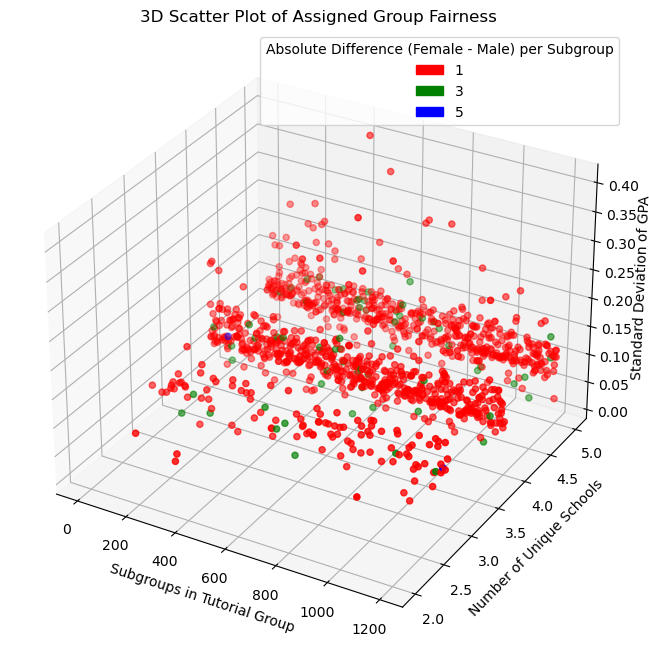

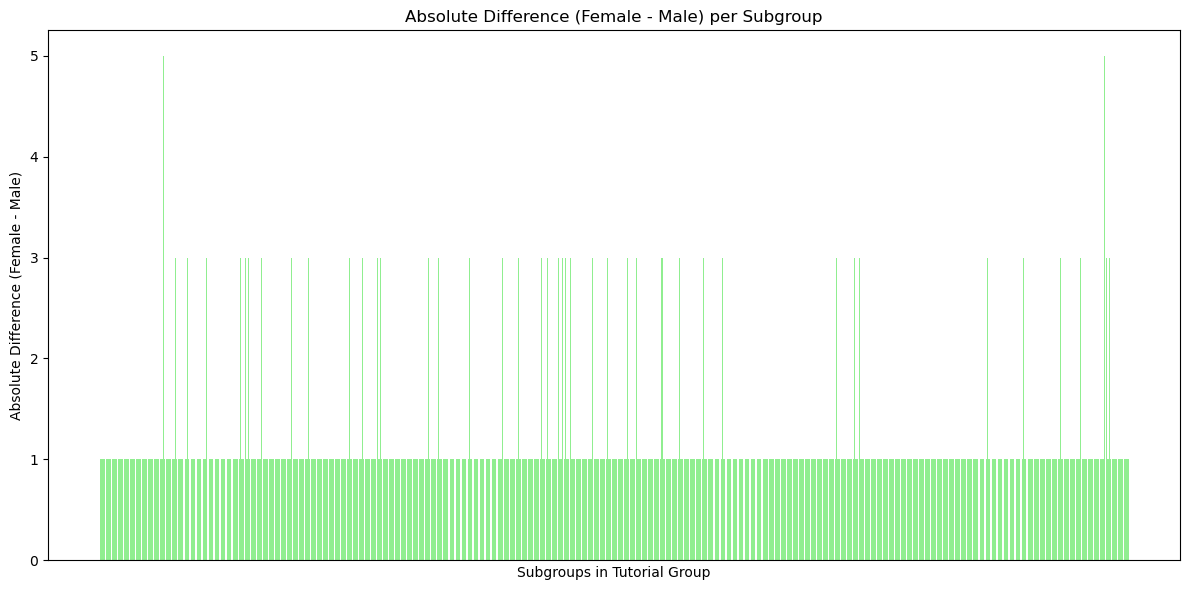

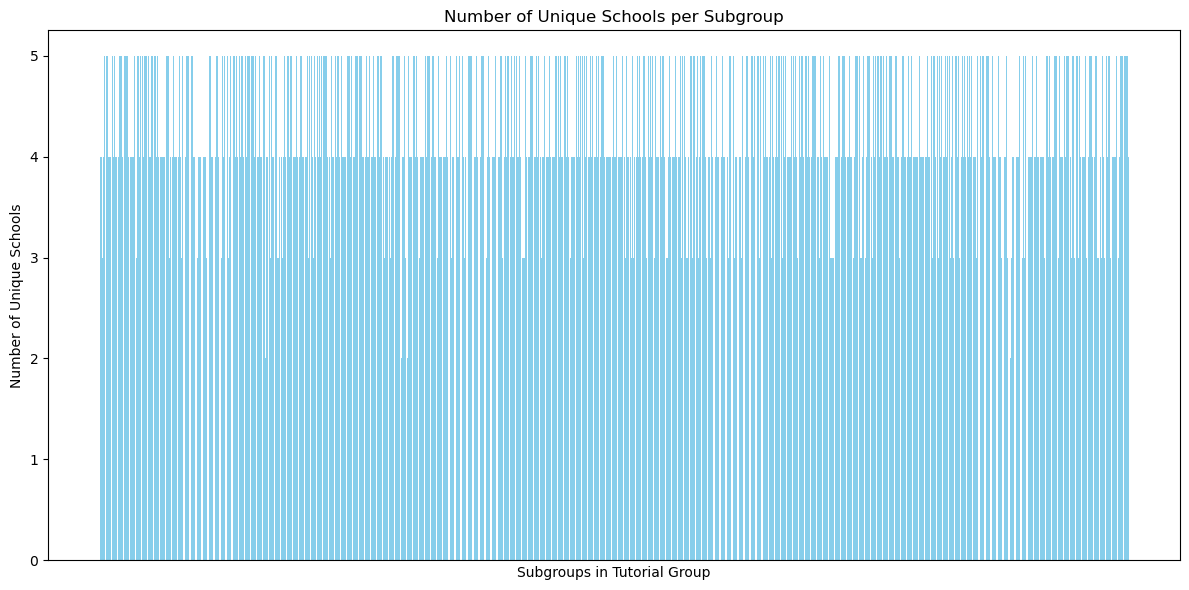

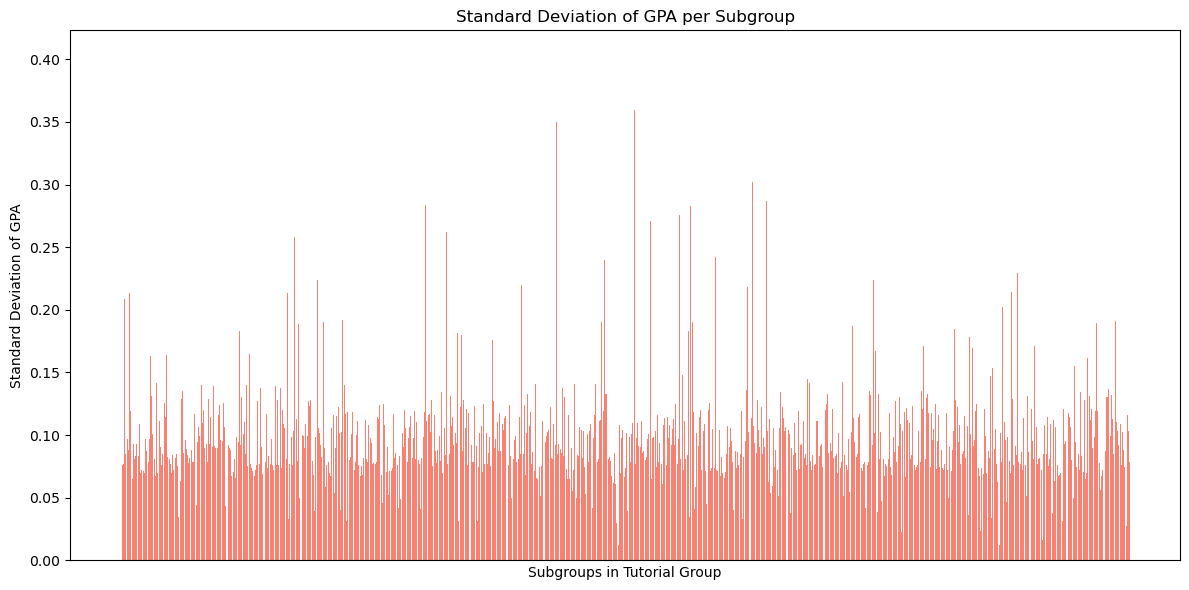

In [38]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches  # For the legend


# Create dictionaries to store gender counts, GPA data, and school variety
gender_counts = {}
gpa_data = {}
school_variety = {}

with open("C:\\Users\\jesmo\\Downloads\\Grouped_student.csv", mode='r') as file:
    csv_reader = csv.reader(file)
    next(csv_reader)  
    for row in csv_reader:
        tutorial_group, group_number, gender, school = row[0], row[6], row[4], row[2]
        try:
            gpa = float(row[5])
        except ValueError:
            continue  # Skip non-numeric GPA values

        # Ensure necessary dictionaries exist for gender counts, GPA data, and school variety
        if tutorial_group not in gender_counts:
            gender_counts[tutorial_group] = {}
        if group_number not in gender_counts[tutorial_group]:
            gender_counts[tutorial_group][group_number] = {'Male': 0, 'Female': 0}

        if tutorial_group not in gpa_data:
            gpa_data[tutorial_group] = {}
        if group_number not in gpa_data[tutorial_group]:
            gpa_data[tutorial_group][group_number] = []

        if tutorial_group not in school_variety:
            school_variety[tutorial_group] = {}
        if group_number not in school_variety[tutorial_group]:
            school_variety[tutorial_group][group_number] = set()

        # Update the data
        gender_counts[tutorial_group][group_number][gender] += 1
        gpa_data[tutorial_group][group_number].append(gpa)
        school_variety[tutorial_group][group_number].add(school)

# Prepare data for plotting
x, y, z, colors = [], [], [], []
absolute_differences = []  # To hold modulus differences for bar graph
unique_schools_counts = []  # To hold counts of unique schools
std_dev_gpas = []           # To hold standard deviations of GPAs
labels = []                 # Labels for each bar
distinct_values = {1: 'red', 3: 'green', 5: 'blue'}

# Process the data for plotting
for tutorial_group, groups in gender_counts.items():
    for group_number, counts in groups.items():
        # Modulus difference and color
        modulus_difference = abs(counts['Female'] - counts['Male'])
        color = distinct_values.get(modulus_difference)
        colors.append(color)
        absolute_differences.append(modulus_difference)

        # GPA standard deviation
        gpas = gpa_data[tutorial_group][group_number]
        mean = sum(gpas) / len(gpas) if gpas else 0
        std_dev = sqrt(sum((x - mean) ** 2 for x in gpas) / len(gpas)) if gpas else 0
        std_dev_gpas.append(std_dev)

        # Unique schools
        unique_schools = len(school_variety[tutorial_group][group_number])
        unique_schools_counts.append(unique_schools)

        # Prepare x and label
        y.append(unique_schools)
        x.append(f"{tutorial_group}-{group_number}")
        labels.append(f"{tutorial_group}-{group_number}")

# Convert combined identifiers to numerical values for plotting
x_numerical = list(range(len(x)))

# Create 3D scatter plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(x_numerical, y, std_dev_gpas, c=colors)
ax.set_xlabel('Subgroups in Tutorial Group')
ax.set_ylabel('Number of Unique Schools')
ax.set_zlabel('Standard Deviation of GPA', labelpad=1)

# Add title  
plt.title('3D Scatter Plot of Assigned Group Fairness')

# Create the legend for colors
legend_labels = {1: '1', 3: '3', 5: '5'}  
handles = [mpatches.Patch(color=color, label=legend_labels.get(modulus, f"Modulus {modulus}")) 
           for modulus, color in distinct_values.items()]
plt.legend(handles=handles, title="Absolute Difference (Female - Male) per Subgroup")

# Show the 3D scatter plot
plt.show()

# Create bar chart for modulus differences
plt.figure(figsize=(12, 6))
plt.bar(labels, absolute_differences, color='lightgreen')
plt.xticks([])  # Removes tick marks and labels
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.xlabel('Subgroups in Tutorial Group')
plt.ylabel('Absolute Difference (Female - Male)')
plt.title('Absolute Difference (Female - Male) per Subgroup')
plt.tight_layout()
plt.show()

# Create bar chart for unique schools
plt.figure(figsize=(12, 6))
plt.bar(labels, unique_schools_counts, color='skyblue')
plt.xticks([])  # Removes tick marks and labels
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.xlabel('Subgroups in Tutorial Group')
plt.ylabel('Number of Unique Schools')
plt.title('Number of Unique Schools per Subgroup')
plt.tight_layout()
plt.show()

# Create bar chart for standard deviations of GPAs
plt.figure(figsize=(12, 6))
plt.bar(labels, std_dev_gpas, color='salmon')
plt.xticks([])  # Removes tick marks and labels
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.xlabel('Subgroups in Tutorial Group')
plt.ylabel('Standard Deviation of GPA')
plt.title('Standard Deviation of GPA per Subgroup')
plt.tight_layout()
plt.show()
